## This notebook is an attempt to explain two popular distance criteria in machine learning or specifically text analytics- Euclidean and Cosine distance

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0]])

In [24]:

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


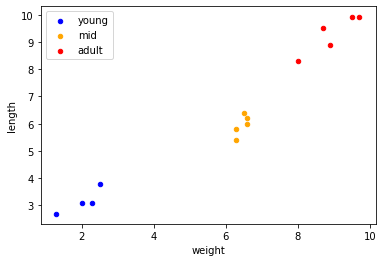

In [25]:
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

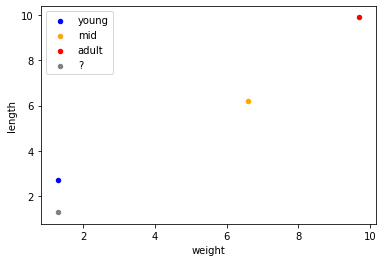

In [26]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame({'weight':[1.3],'length':[1.3]})

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
ax


#### Euclidean


In [29]:
# Euclidean distance can be defined as follows:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))


In [30]:
x0 = X[0][:-1]

In [ ]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
xn = np.array([1.3,1.3])
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nxn:", xn)

In [36]:
print(" xn and x0:", euclidean_distance(xn, x0), "\n",
      "xn and x1:", euclidean_distance(xn, x1), "\n",
      "xn and x4:", euclidean_distance(xn, x4))

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
xn: [1.3 1.3]
 xn and x0: 7.218032973047436 
 xn and x1: 12.021647141718974 
 xn and x4: 1.4000000000000001


In [41]:
# x4 is the closest point. 
X[4]

array([1.3, 2.7, 0. ])

In [42]:
# X[4] has the label= 0
# 0 = young

In [43]:
# Cosine distance can be defined as follows:

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [44]:
# Let’s see these calculations for all our vectors:

print(" xn and x0:", cosine_similarity(xn, x0), "\n",
      "xn and x1:", cosine_similarity(xn, x1), "\n",
      "xn and x4:", cosine_similarity(xn, x4))

 xn and x0: 0.9995120760870786 
 xn and x1: 0.9999479424242859 
 xn and x4: 0.9438583563660174


In [45]:
# According to cosine similarity, this point is closest to x1. x1 instance had the label:
X[1]

array([9.7, 9.9, 2. ])

#### What is cosine similarity?

Cosine similarity is the cosine of the angle between two n-dimensional vectors in an n-dimensional space.
In our example the angle between xn and x1 was smaller than those of the other vectors, 
even though x1 was not actually closest to xn by geometric distance

#### When to Use Cosine?

Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. This happens for example when working with text data represented by word counts. We could assume that when a word (e.g. science) occurs more frequent in document 1 than it does in document 2, that document 1 is more related to the topic of science. However, it could also be the case that we are working with documents of uneven lengths (Wikipedia articles for example). Then, science probably occurred more in document 1 just because it was way longer than document 2. Cosine similarity corrects for this.

#### How do Euclidean Distance and Cosine Similarity Relate?

In [49]:
# Let us consider 2 vectors and find their euclidean and cosine distance: 
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t", cosine_similarity(x0, x1))

vectors 	 [6.6 6.2] [9.7 9.9] 
euclidean 	 4.827007354458868 
cosine 		 0.9991413385403556


Cosine similarity takes a unit length vector to calculate dot products. However, what happens if we do the same for the vectors we’re calculating the euclidian distance for (i.e. normalize them)? For this, we can for example use the L1 norm:

In [51]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

In [52]:
x0_norm = l1_normalize(x0)
x1_norm = l1_normalize(xn)
print(x0_norm, x1_norm)

[0.515625 0.484375] [0.5 0.5]


In [54]:
# Let’s compare the result we had before against these normalized vectors:

print("vectors \t", x0_norm, x1_norm, "\n"
      "euclidean \t", euclidean_distance(x0_norm, x1_norm), "\n"
      "cosine \t\t", cosine_similarity(x0_norm, x1_norm))

vectors 	 [0.515625 0.484375] [0.5 0.5] 
euclidean 	 0.022097086912079532 
cosine 		 0.9995120760870787


As we can see, before, the distance was pretty big, but the cosine similarity very high. Now that we normalized our vectors, it turns out that the distance is now very small. The same pattern occurs when we compare it against vector 4. Unnormalized:

In [55]:
print("vectors \t", x0, x4, "\n"
      "euclidean \t", euclidean_distance(x0, x4), "\n"
      "cosine \t\t", cosine_similarity(x0, x4))

vectors 	 [6.6 6.2] [1.3 2.7] 
euclidean 	 6.351377803280167 
cosine 		 0.9330794115892785


Normalized:

In [57]:
x4_norm = l1_normalize(x4)

print("vectors \t", x0_norm, x4_norm, "\n"
      "euclidean \t", euclidean_distance(x0_norm, x4_norm), "\n"
      "cosine \t\t", cosine_similarity(x0_norm, x4_norm))

vectors 	 [0.515625 0.484375] [0.325 0.675] 
euclidean 	 0.26958446032737116 
cosine 		 0.9330794115892785


Notice that because the cosine similarity is a bit lower between x0 and x4 than it was for x0 and x1, the euclidean distance is now also a bit larger. 